<a href="https://colab.research.google.com/github/danielaterra/shape-features/blob/main/MV_shapeFeatures_versao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conecta gdrive #

In [1]:
#from google.colab import drive
#drive.mount("/content/drive/")

In [1]:
import sys
import os

In [2]:
sys.path.append(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(os.path.dirname(os.getcwd()),'utils'))
sys.path.append(os.getcwd())

In [3]:
import numpy as np
import pandas as pd
from math import sqrt
import os
import sys
import seaborn
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage import morphology, measure
from skimage.draw import polygon, polygon_perimeter
from random import randint
from random import sample
import csv
#import rpy2
import matplotlib
SMALL_SIZE = 8
matplotlib.rc('font', size=SMALL_SIZE-1)
matplotlib.rc('axes', titlesize=SMALL_SIZE)
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, norm
from plotnine import ggplot, aes, facet_grid, labs, geom_col, theme, theme_tufte
#from ggplot import *
import utils.functions


# Multivariate Analysis#

## Lê csv estatisticas ##

In [8]:
## Recupera arquivo
normalized_fts =pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'files', 'normalized_features.csv'), index_col=0)

In [174]:
normalized_fts.shape
vars_fdN = ['fdN1', 'fdN22', 'fdN26', 'fdN28', 'fdN29', 'fdN30', 'fdN31', 'fdN32', 'fdN33', 'fdN34', 'fdN35', 'fdN36', 'fdN37', 'fdN38', 'fdN39']

In [186]:
vars_N = list(normalized_fts.keys()[3:29]) + vars_fdN
vars_C = list(normalized_fts.keys()[69:95])
vars_NC = list(normalized_fts.keys()[135:])
vars_all =  vars_N + vars_C + vars_NC

In [187]:
print('N° feat. N:', len(vars_N), vars_N, end='')
print('\nN° feat. C:', len(vars_C), vars_C, end='')
print('\nN° feat. N/C :', len(vars_NC), vars_NC, end='')
print('\nTotal:', len(vars_all), vars_all, end='')

N° feat. N: 41 ['areaN', 'perimeterN', 'major_axisN', 'minor_axisN', 'equivalent_diameterN', 'eccentricityN', 'circularityN', 'convexityN', 'solidityN', 'extentN', 'radial_distance_maxN', 'radial_distance_meanN', 'radial_distance_sdN', 'RAN', 'RIN', 'radial_distance_EN', 'radial_distance_kurtoseN', 'Use_curv1N', 'Use_curv2N', 'Use_curv3N', 'Use_curv4N', 'Use_curv5N', 'Use_curv6N', 'Use_curv7N', 'Use_curv8N', 'major_axis_angleN', 'fdN1', 'fdN22', 'fdN26', 'fdN28', 'fdN29', 'fdN30', 'fdN31', 'fdN32', 'fdN33', 'fdN34', 'fdN35', 'fdN36', 'fdN37', 'fdN38', 'fdN39']
N° feat. C: 26 ['areaC', 'perimeterC', 'major_axisC', 'minor_axisC', 'equivalent_diameterC', 'eccentricityC', 'circularityC', 'convexityC', 'solidityC', 'extentC', 'radial_distance_maxC', 'radial_distance_meanC', 'radial_distance_sdC', 'RAC', 'RIC', 'radial_distance_EC', 'radial_distance_kurtoseC', 'Use_curv1C', 'Use_curv2C', 'Use_curv3C', 'Use_curv4C', 'Use_curv5C', 'Use_curv6C', 'Use_curv7C', 'Use_curv8C', 'major_axis_angleC']


## **Correlação entre atributos do Núcleo das células**##

In [189]:
cor_nucleos = pd.DataFrame(data   = np.expand_dims(np.array(['n.a']*len(vars_N)),1), \
                          index   = vars_N[:], \
                          columns = np.array(['Cor. (>90%)']))

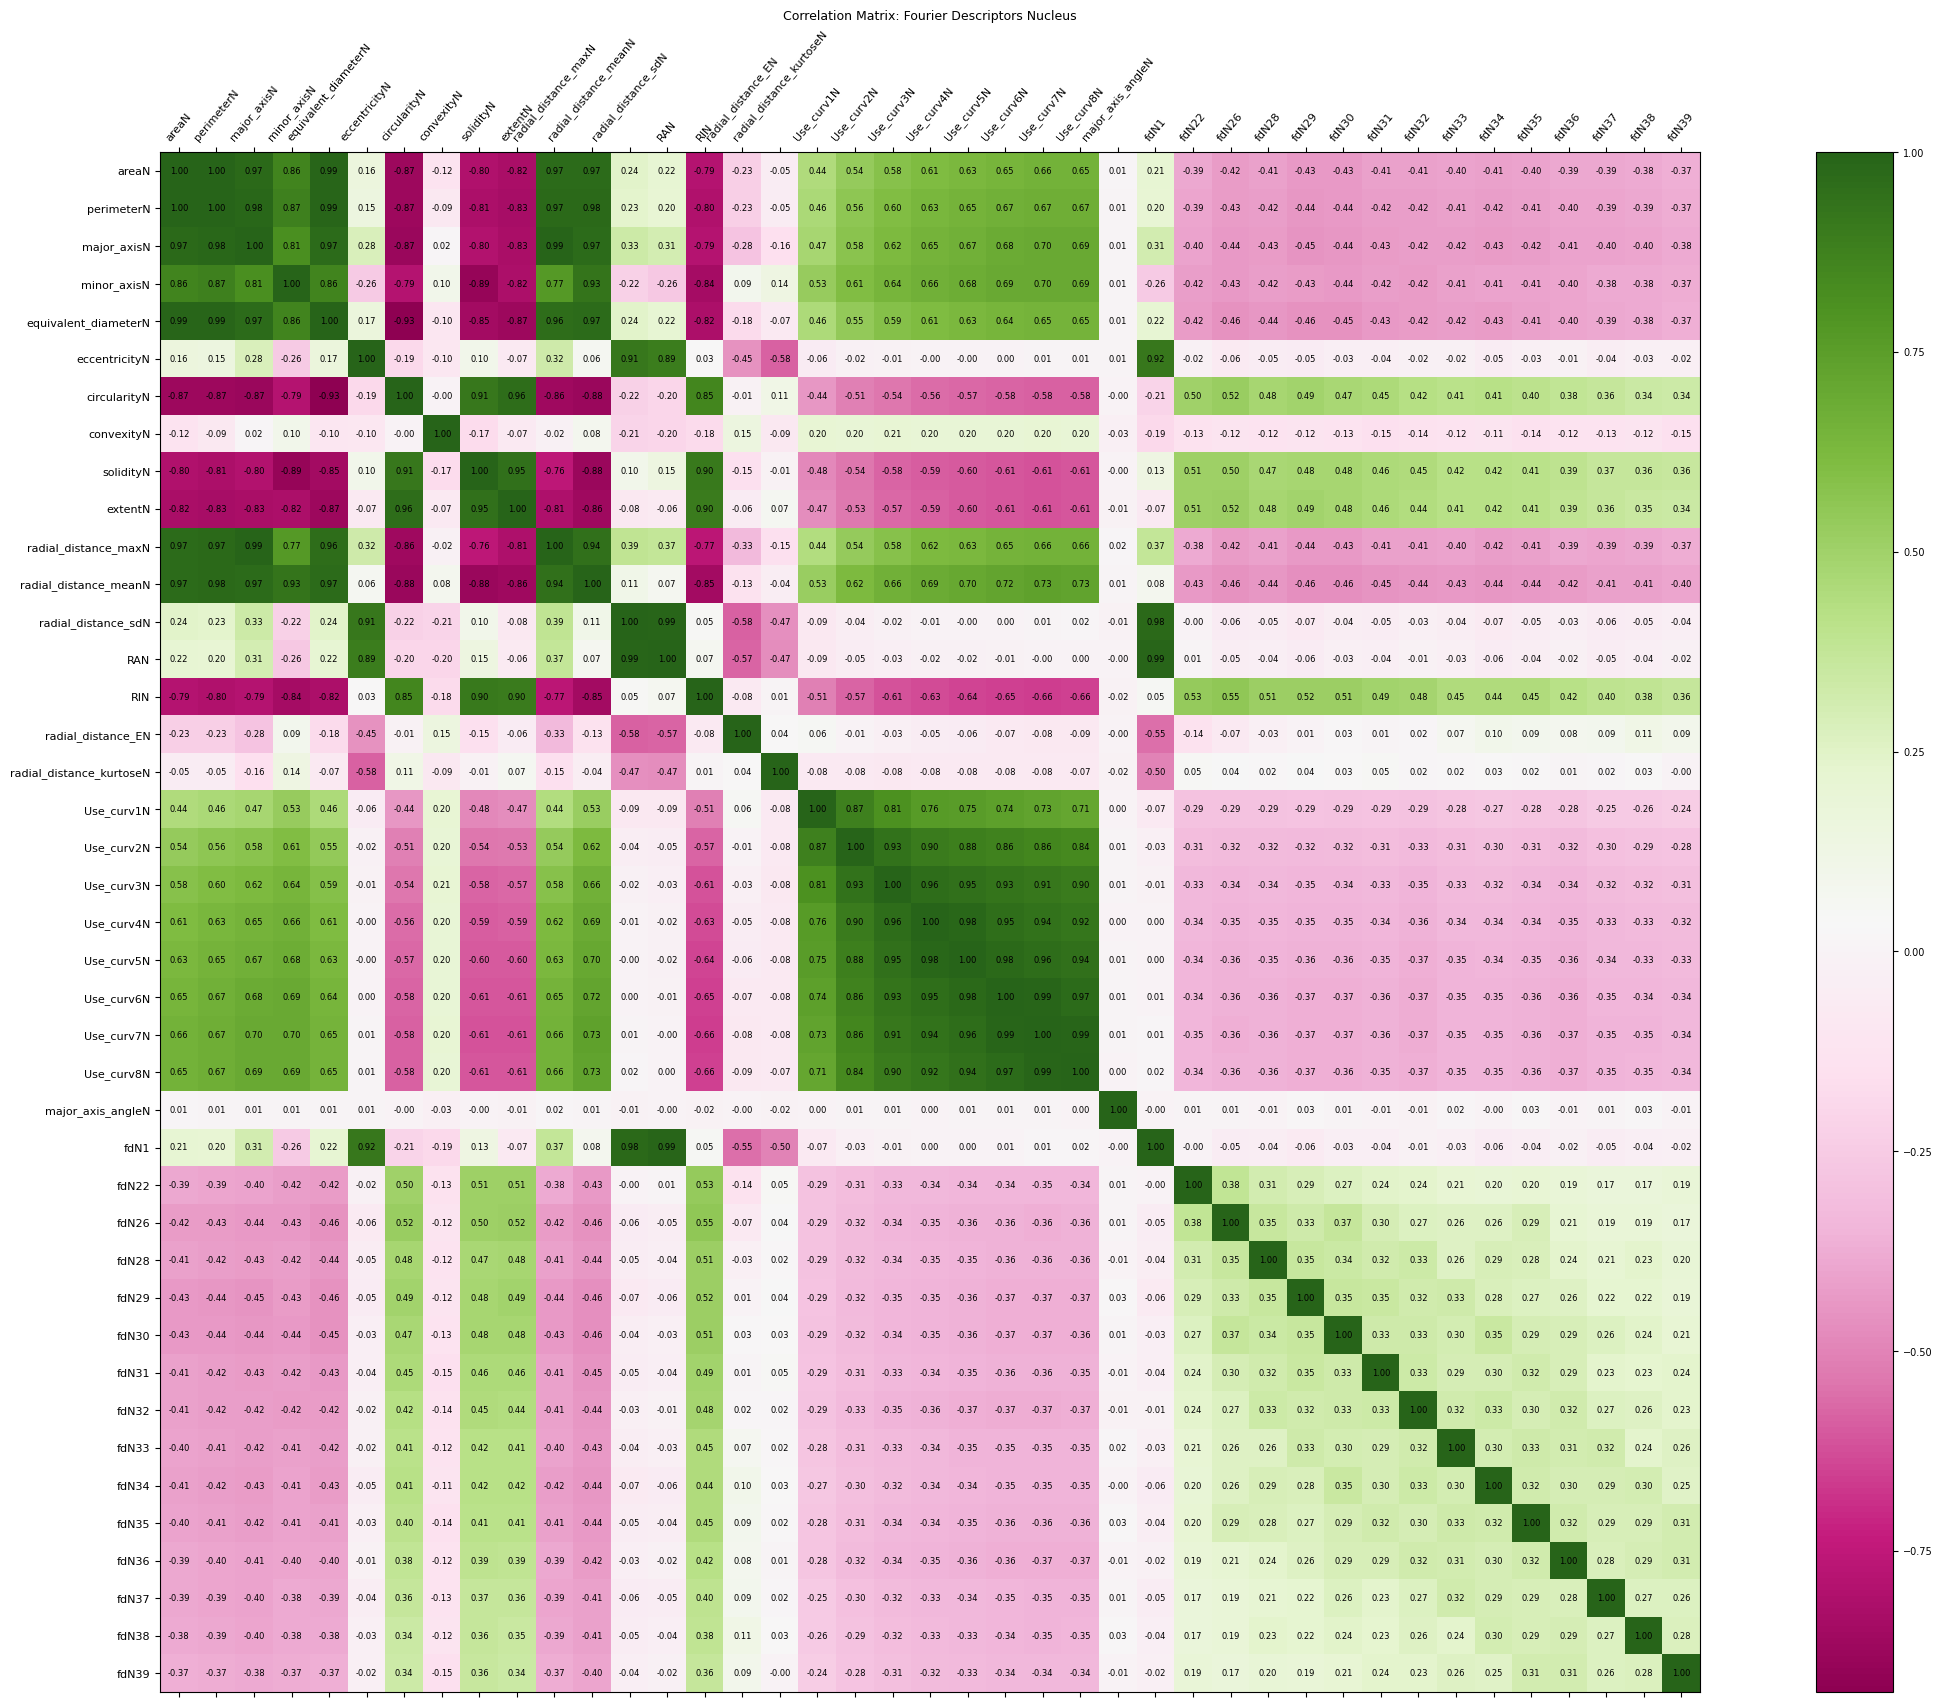

In [191]:
# Select variables to analize
nucleus_fts = normalized_fts[vars_N]
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot()
fi = ax.matshow(nucleus_fts.corr(), cmap= 'PiYG')
ax.matshow(nucleus_fts.corr(), cmap='PiYG')
for (i, j), z in np.ndenumerate(nucleus_fts.corr()):
    ax.text(j, i, '{:0.2f}'.format(z), fontsize=6, ha='center', va='center')       
     
plt.xticks(range(nucleus_fts.select_dtypes(['number']).shape[1]), nucleus_fts.select_dtypes(['number']).columns, fontsize=8, rotation=50)
plt.yticks(range(nucleus_fts.select_dtypes(['number']).shape[1]), nucleus_fts.select_dtypes(['number']).columns, fontsize=8)

cb = fig.colorbar(fi)
cb.ax.tick_params(labelsize=7)
plt.title('Correlation Matrix: Fourier Descriptors Nucleus', fontsize=9);
#filename = 'CorrNucleus.pdf'
#fig.savefig(fname="/content/drive/MyDrive/PDSE/ShapeBased_multivar_analysis/"+filename)


In [193]:
cor_nucleos = pd.DataFrame(data   = np.expand_dims(np.array(['n.a']*len(vars_N)),1), \
                          index   = vars_N[:], \
                          columns = np.array(['Cor. (>90%)']))
  
for i in  np.arange(nucleus_fts.shape[1]):
    vars_cor = ''
    for j in np.arange(nucleus_fts.shape[1]):
        if (i != j):
            z = nucleus_fts.corr().iloc[i,j]
            if (np.abs(z) >= 0.9):
                  vars_cor = vars_cor + '({}: {:.2f}) '.format(vars_N[j], z)
    cor_nucleos.iloc[i]  = vars_cor
    

In [194]:
cor_nucleos

Cor. (>90%)
areaN                     (perimeterN: 1.00) (major_axisN: 0.97) (equiva...
perimeterN                (areaN: 1.00) (major_axisN: 0.98) (equivalent_...
major_axisN               (areaN: 0.97) (perimeterN: 0.98) (equivalent_d...
minor_axisN                                  (radial_distance_meanN: 0.93) 
equivalent_diameterN      (areaN: 0.99) (perimeterN: 0.99) (major_axisN:...
eccentricityN                     (radial_distance_sdN: 0.91) (fdN1: 0.92) 
circularityN              (equivalent_diameterN: -0.93) (solidityN: 0.91...
convexityN                                                                 
solidityN                 (circularityN: 0.91) (extentN: 0.95) (RIN: 0.90) 
extentN                             (circularityN: 0.96) (solidityN: 0.95) 
radial_distance_maxN      (areaN: 0.97) (perimeterN: 0.97) (major_axisN:...
radial_distance_meanN     (areaN: 0.97) (perimeterN: 0.98) (major_axisN:...
radial_distance_sdN         (eccentricityN: 0.91) (RAN: 0.99) (fdN1: 0.98) 
RAN                               (radial_distance_sdN: 0.99) (fdN1: 0.99) 
RIN                                                      (solidityN: 0.90) 
radial_distance_EN                                                         
radial_distance_kurtoseN                                                   
Use_curv1N                                                                 
Use_curv2N                                              (Use_curv3N: 0.93) 
Use_curv3N                (Use_curv2N: 0.93) (Use_curv4N: 0.96) (Use_cur...
Use_curv4N                (Use_curv3N: 0.96) (Use_curv5N: 0.98) (Use_cur...
Use_curv5N                (Use_curv3N: 0.95) (Use_curv4N: 0.98) (Use_cur...
Use_curv6N                (Use_curv3N: 0.93) (Use_curv4N: 0.95) (Use_cur...
Use_curv7N                (Use_curv3N: 0.91) (Use_curv4N: 0.94) (Use_cur...
Use_curv8N                (Use_curv4N: 0.92) (Use_curv5N: 0.94) (Use_cur...
major_axis_angleN                                                          
fdN1                      (eccentricityN: 0.92) (radial_distance_sdN: 0....
fdN22                                                                      
fdN26                                                                      
fdN28                                                                      
fdN29                                                                      
fdN30                                                                      
fdN31                                                                      
fdN32                                                                      
fdN33                                                                      
fdN34                                                                      
fdN35                                                                      
fdN36                                                                      
fdN37                                                                      
fdN38                                                                      
fdN39

In [55]:
#filter matrix: nucleus_fts.corr()
dict
for i in np.arange(vars_N.shape[-1]):
    
    for j in np.arange(vars_N.shape[-1]):
        (_, j),Z in np.ndenumerate(nucleus_fts.corr()):
          print(i, j)

0
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 

KeyboardInterrupt: 

As shown in the above matrix there are few correlations (<> 90%) among Nucleus area_by_curvature/area

In [38]:
vars_N = ['Use_curv1N', 'Use_curv2N']
print (vars_N, end='')

['Use_curv1N', 'Use_curv2N']

### Nucleus FD's distribution analysis ###
Which characteristics do not differ (i.e., have similar distribution) between classes with different degrees of lesions (low and high degree)?

### Python ###

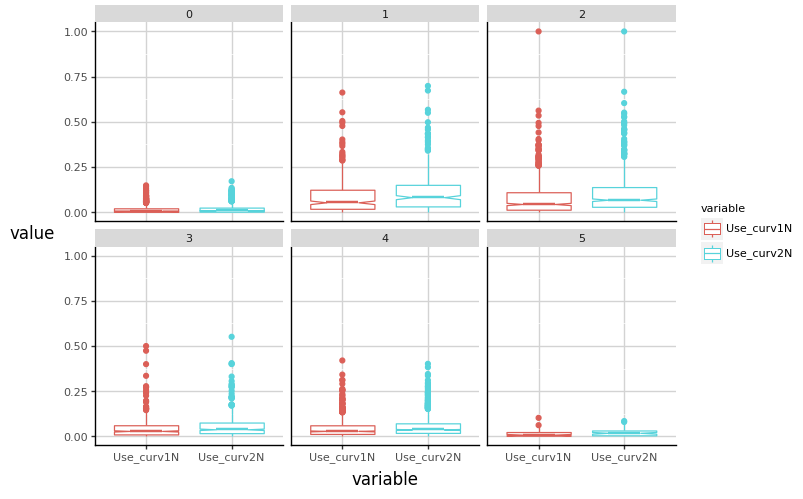

In [39]:
from plotnine import *
from plotnine.data import *
nucleus_fts_1_melt = pd.melt(normalized_fts[['bethesda']+vars_N], id_vars='bethesda')
'''p = ggplot(nucleus_fts_1_melt, aes(x='bethesda', y='value', col='bethesda')) \
    + geom_boxplot(notch = True) \
    +   facet_wrap('~variable')
'''

p = ggplot(nucleus_fts_1_melt, aes(x= 'variable', y= 'value', col=nucleus_fts_1_melt.variable, \
                         color= nucleus_fts_1_melt.variable)) + \
 geom_boxplot(aes(x='variable'), notch=True)  \
 + theme(figure_size=(8,5), \
       axis_line=element_line(size=1, colour="black"), \
         panel_grid_major=element_line(colour="#d3d3d3"), \
       text=element_text(size=8, angle=0), \
            panel_border=element_blank(), \
        panel_background=element_blank(), \
      axis_title_x = element_text(size=12, angle = 0), \
      axis_title_y = element_text(size=12, angle=0)) \
      + facet_wrap('~ bethesda')
      
#filename = 'NucleoBoxplot.pdf'
#ggsave(p,filename =filename, path ="/content/drive/MyDrive/PDSE/ShapeBased_multivar_analysis", width=15, height=10)
p.draw()

In [35]:
len(vars_N)

2

### R ###

### **T-Test - teste das médias para valores de atributos entre classes** ###

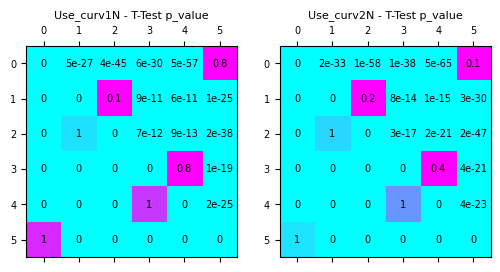

In [40]:
utils.functions.plot_pvalues_variables_less_vars(normalized_fts[['bethesda']+vars_N], vars_N, c=2)

### Nucleus selected ###

In [41]:
cols_nucleo = ['Use_curv2N']
 
print(cols_nucleo) 

['Use_curv2N']


## **Correlação entre atributos do Citoplasma das células** ##

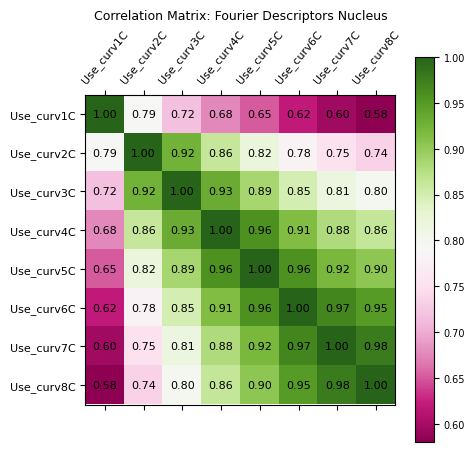

In [43]:
# Select variables to analize
nucleus_fts = normalized_fts[vars_C]
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
fi = ax.matshow(nucleus_fts.corr(), cmap= 'PiYG')
ax.matshow(nucleus_fts.corr(), cmap='PiYG')

for (i, j), z in np.ndenumerate(nucleus_fts.corr()):
    ax.text(j, i, '{:0.2f}'.format(z), fontsize=8, ha='center', va='center')

plt.xticks(range(nucleus_fts.select_dtypes(['number']).shape[1]), nucleus_fts.select_dtypes(['number']).columns, fontsize=8, rotation=50)
plt.yticks(range(nucleus_fts.select_dtypes(['number']).shape[1]), nucleus_fts.select_dtypes(['number']).columns, fontsize=8)

cb = fig.colorbar(fi)
cb.ax.tick_params(labelsize=7)
plt.title('Correlation Matrix: Fourier Descriptors Nucleus', fontsize=9);
#filename = 'CorrNucleus.pdf'

#fig.savefig(fname="/content/drive/MyDrive/PDSE/ShapeBased_multivar_analysis/"+filename)


As shown in the above matrix we can select the following features with less than 90% correlations with each other:
- **Use_curv1C, Use_curv2C, Use_curv4C, Use_curv7C**

In [45]:
vars_C = ['Use_curv1C', 'Use_curv2C', 'Use_curv4C', 'Use_curv7C']

#### Python

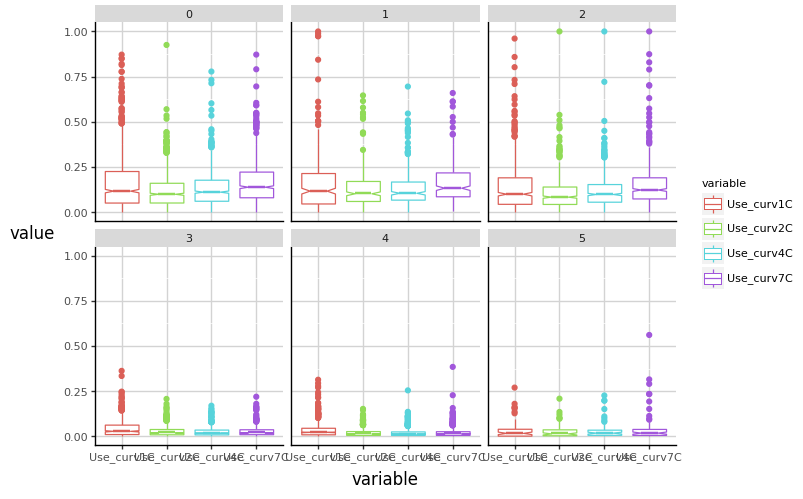

In [51]:
cyto_fts_1_melt = pd.melt(normalized_fts[['bethesda']+vars_C], id_vars='bethesda')
'''p = ggplot(cyto_fts_1_melt, aes(x='bethesda', y='value', col='bethesda')) \
    + geom_boxplot(notch = True) \
    +   facet_wrap('~variable')
'''

p = ggplot(cyto_fts_1_melt, aes(x= 'variable', y= 'value', col=cyto_fts_1_melt.variable, \
                         color= cyto_fts_1_melt.variable)) + \
 geom_boxplot(aes(x='variable'), notch=True)  \
 + theme(figure_size=(8,5), \
       axis_line=element_line(size=1, colour="black"), \
         panel_grid_major=element_line(colour="#d3d3d3"), \
       text=element_text(size=8, angle=0), \
            panel_border=element_blank(), \
        panel_background=element_blank(), \
      axis_title_x = element_text(size=12, angle = 0), \
      axis_title_y = element_text(size=12, angle=0)) \
      + facet_wrap('~ bethesda')
      
#filename = 'NucleoBoxplot.pdf'
#ggsave(p,filename =filename, path ="/content/drive/MyDrive/PDSE/ShapeBased_multivar_analysis", width=15, height=10)
p.draw()


#### R  

#### **T-Test - teste das médias para valores de atributos entre classes**

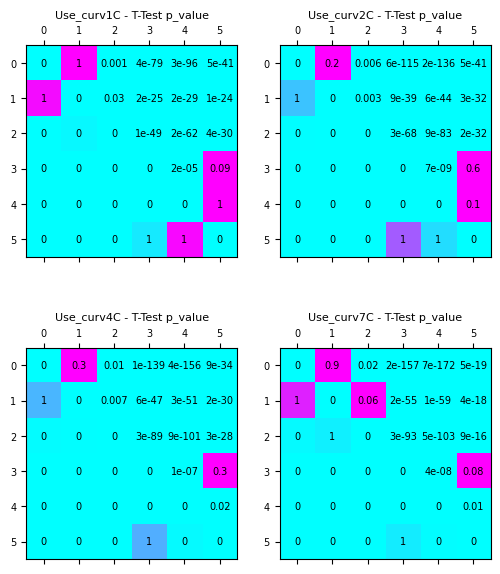

In [50]:
utils.functions.plot_pvalues_variables(normalized_fts[['bethesda']+vars_C], vars_C, c=2, l=2)

### Cytoplasm selected ###
- No Use_curv selected for cytoplasm 
- All Use_curv selected are similar in normal and in lesions (ASCUS) cases

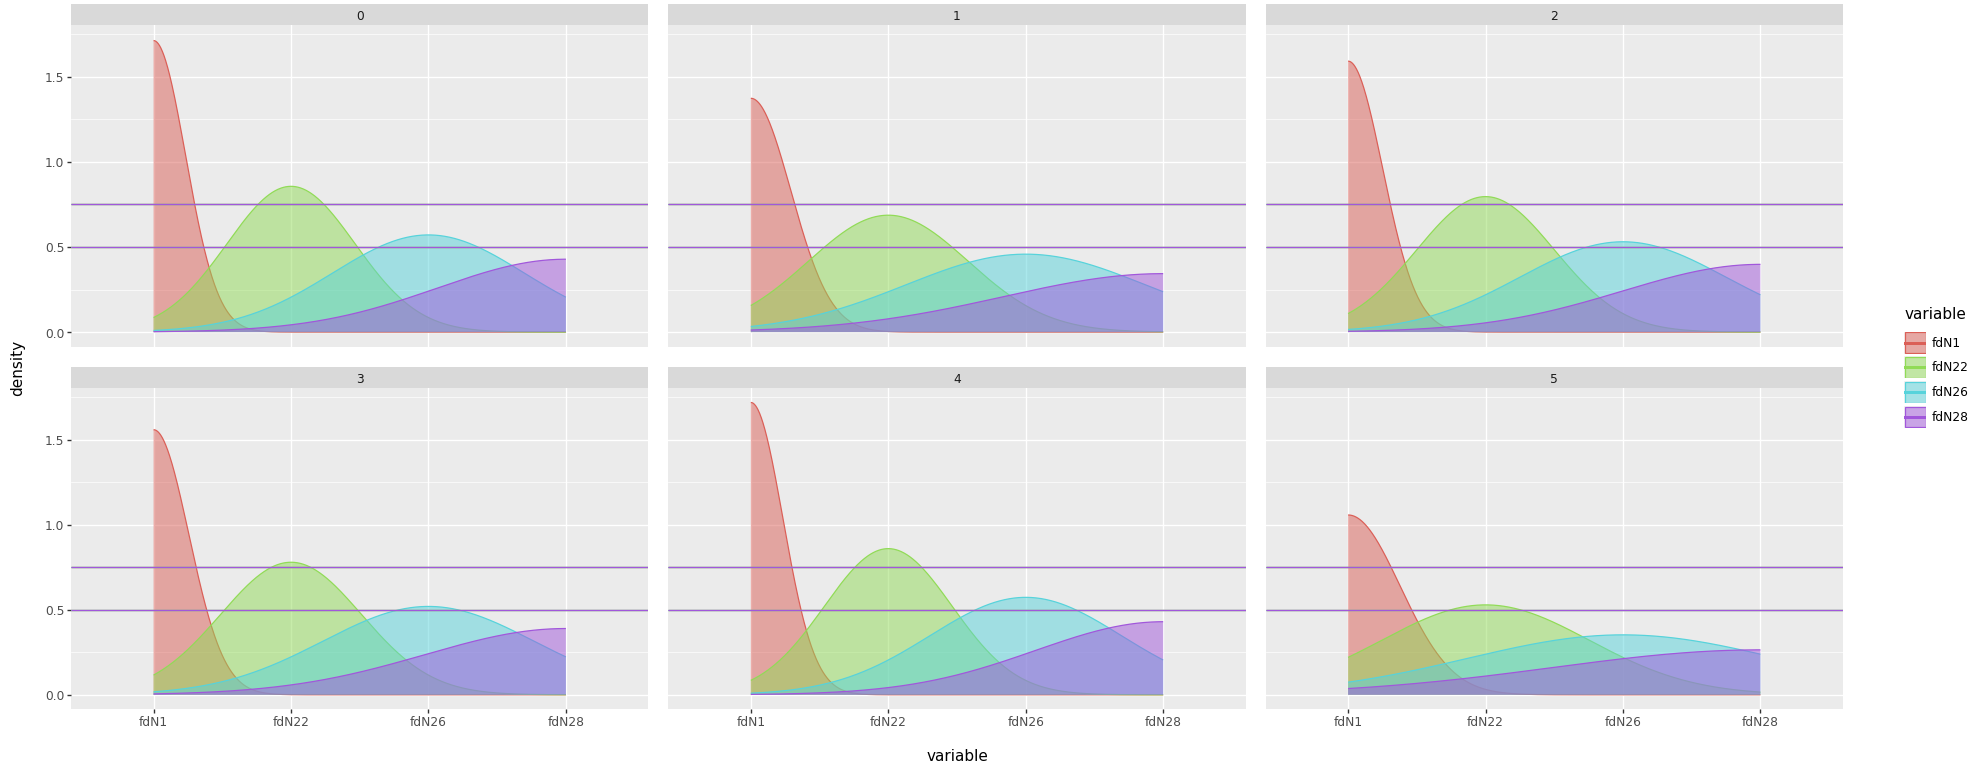

In [ ]:
p = ggplot(normalized_fts_2_melt, aes(x= normalized_fts_2_melt.variable, fill = normalized_fts_2_melt.variable, color= normalized_fts_2_melt.variable))  \
+ geom_density(alpha=0.5, position="identity") + facet_wrap("~bethesda") + theme(figure_size=(20, 8)) \
+ geom_hline(normalized_fts_2_melt, aes(yintercept= 0.75, colour= normalized_fts_2_melt.variable)) +  geom_hline(normalized_fts_2_melt, aes(yintercept= 0.5, color= normalized_fts_2_melt.variable))
p.draw()